# Paper/Slides Discussion

In [1]:
import json
dataset = 'WebNLG'
data_path = f'/content/drive/MyDrive/RE/CasRel-Torch/data/{dataset}'
train = json.load(open(f'{data_path}/train_triples.json'))
rel2id = json.load(open(f'{data_path}/rel2id.json'))[1]
id2rel = json.load(open(f'{data_path}/rel2id.json'))[0]

In [2]:
import numpy as np
import itertools

rel2rel = np.zeros((len(rel2id), len(rel2id)), dtype=int)

for item in train:
  OER = dict()
  for triple in item['triple_list']:
    if triple[0] in OER.keys():
      OER[triple[0]].add(rel2id[triple[1]])
    else:
      OER[triple[0]] = set()
  for subject in OER.keys():
    if len(OER[subject]) > 1:
      for element in itertools.product(OER[subject], OER[subject]):
        if element[0] != element[1]:
          rel2rel[element[0], element[1]] += 1

In [3]:
rel2rel_list = []
for rel_i in range(1, len(rel2id)):
  for rel_j in range(rel_i):
    if rel2rel[rel_i, rel_j] > 1:
      rel2rel_list.append((id2rel[str(rel_i)], id2rel[str(rel_j)], rel2rel[rel_i, rel_j]))
rel2rel_list.sort(key=lambda x: x[2], reverse=True)
print(rel2rel_list)

[('occupation', 'birthPlace', 62), ('deathPlace', 'birthPlace', 44), ('was selected by NASA', 'birthPlace', 42), ('was a crew member of', 'birthPlace', 39), ('ingredient', 'country', 36), ('leaderName', 'capital', 33), ('isPartOf', 'country', 31), ('leaderTitle', 'leaderName', 30), ('region', 'ingredient', 30), ('was a crew member of', 'occupation', 29), ('established', 'academicStaffSize', 27), ('language', 'ethnicGroup', 27), ('leaderName', 'language', 27), ('established', 'city', 26), ('was selected by NASA', 'occupation', 25), ('runwayLength', 'elevationAboveTheSeaLevel_(in_metres)', 24), ('was selected by NASA', 'was a crew member of', 24), ('numberOfStudents', 'established', 22), ('occupation', 'deathPlace', 22), ('leaderName', 'ethnicGroup', 21), ('season', 'numberOfMembers', 21), ('ethnicGroup', 'capital', 20), ('numberOfStudents', 'city', 20), ('elevationAboveTheSeaLevel_(in_metres)', 'cityServed', 19), ('state', 'established', 18), ('numberOfPostgraduateStudents', 'affiliatio

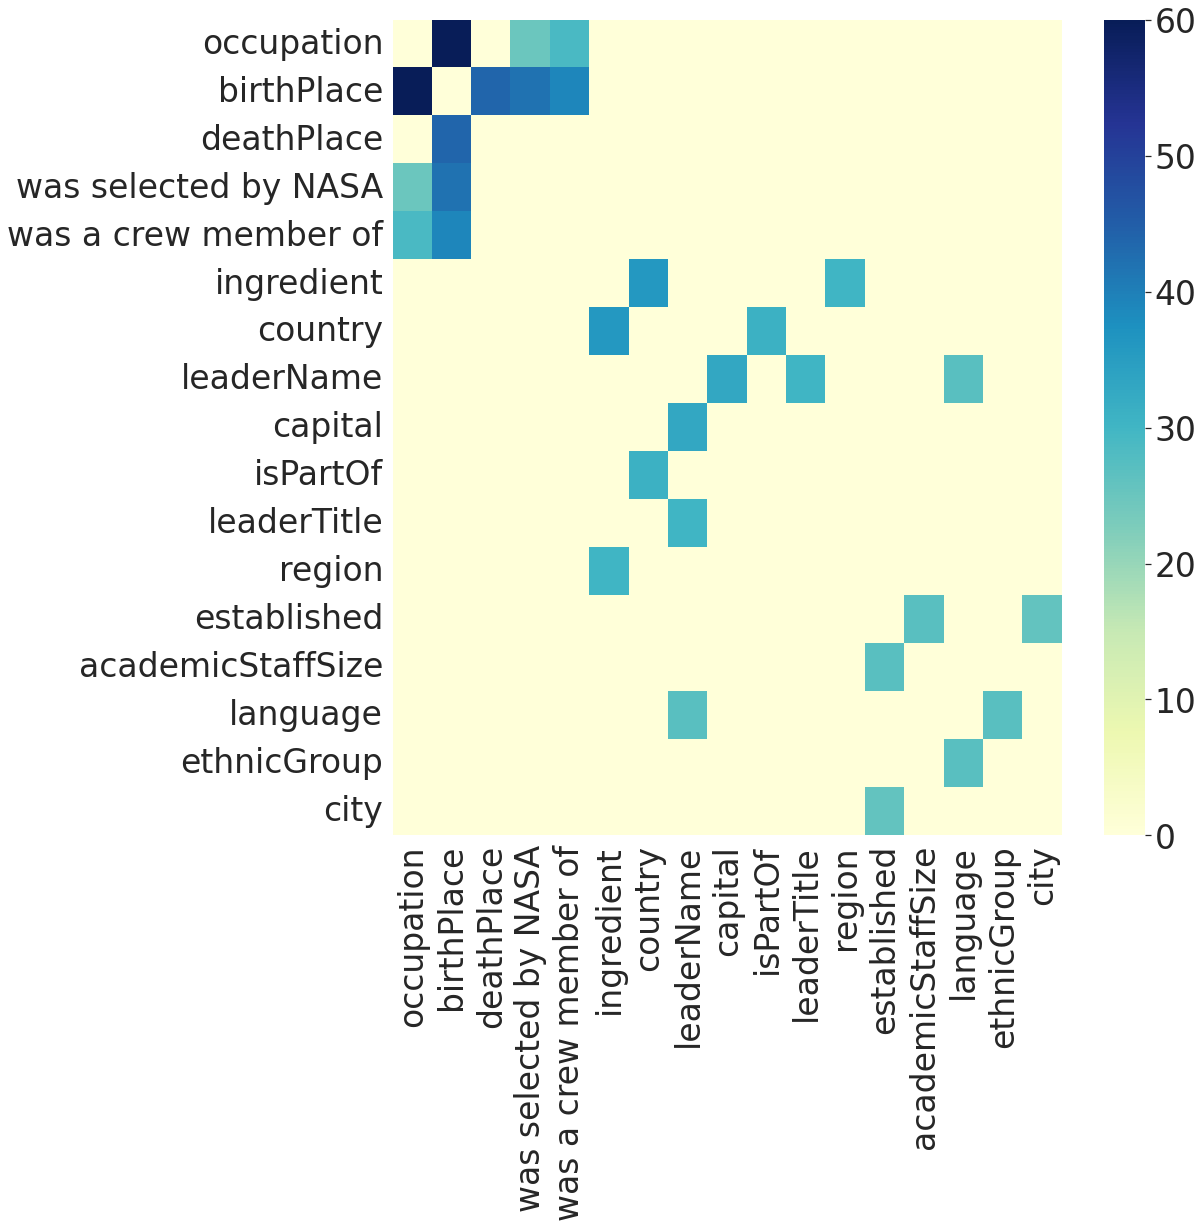

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
fig, ax = plt.subplots(figsize=(15,15))  
nums = 15
sns.set(font_scale = 3)
rel_nums = len(set.union({item[0] for item in rel2rel_list[:nums]}, {item[1] for item in rel2rel_list[:nums]}))
idx = 0
index_dict = dict()
rel2rel_maximums = np.zeros((rel_nums, rel_nums), dtype=int)
for item in rel2rel_list[:nums]:
  if not item[0] in index_dict.keys():
    index_dict[item[0]] = idx
    idx += 1
  if not item[1] in index_dict.keys():
    index_dict[item[1]] = idx
    idx += 1
  if item[0] in index_dict.keys() and item[1] in index_dict.keys():
    rel2rel_maximums[index_dict[item[0]], index_dict[item[1]]] += item[2]
    rel2rel_maximums[index_dict[item[1]], index_dict[item[0]]] += item[2]

ax = sns.heatmap(rel2rel_maximums, vmax=60, square=False,  cmap="YlGnBu", xticklabels=index_dict.keys(), yticklabels=index_dict.keys(), ax=ax)
plt.savefig(f'{dataset}_rel2rel.jpg', format='jpg', dpi=400, quality=95, pad_inches=1)
plt.show()

In [ ]:
import json

N = 2
basic = [json.loads(line) for line in open(f'/content/drive/MyDrive/RE/CasRel-Torch/Analysis/CASREL-WebNLG/test_triples_{N}_output_WebNLG.json').readlines()]
rethinking = [json.loads(line) for line in open(f'/content/drive/MyDrive/RE/CasRel-Torch/Analysis/Rethinking-WebNLG/{N}_triples_output_WebNLG.json').readlines()]
main = json.load(open(f'/content/drive/MyDrive/RE/CasRel-Torch/data/WebNLG/test_triples_{N}.json'))

for i in range(len(basic)):
  b = basic[i]
  r = rethinking[i]
  del r['text']
  del b['text']
  # if len(b['triple_list_pred']) > len(r['triple_list_pred']) and (len(b['lack']) < len(r['lack'])) and len(b['new']) == 0:
  if len(r['new']) > len(b['new']) and len(r['lack']) >= len(b['lack']) :
    print(main[i]['text'])
    print(f"Basic Casrel: {json.dumps(b, indent=2)}")
    print('-' * 20)
    print(f"Rethinking Casrel: {json.dumps(r, indent=2)}")
    print('=' * 100)

In the United Kingdom , the Prime Minister is David Cameron and the UNK is Elizabeth II . The AIDS journal was published in the United Kingdom by Lippincott , Williams & Wilkins .
Basic Casrel: {
  "triple_list_gold": [
    {
      "subject": "Kingdom",
      "relation": "leaderName",
      "object": "Cameron"
    },
    {
      "subject": "Kingdom",
      "relation": "leaderName",
      "object": "II"
    }
  ],
  "triple_list_pred": [
    {
      "subject": "Kingdom",
      "relation": "leaderName",
      "object": "Cameron"
    },
    {
      "subject": "Kingdom",
      "relation": "leaderName",
      "object": "II"
    }
  ],
  "new": [],
  "lack": []
}
--------------------
Rethinking Casrel: {
  "triple_list_gold": [
    {
      "subject": "Kingdom",
      "relation": "leaderName",
      "object": "Cameron"
    },
    {
      "subject": "Kingdom",
      "relation": "leaderName",
      "object": "II"
    }
  ],
  "triple_list_pred": [
    {
      "subject": "Kingdom",
      "relati